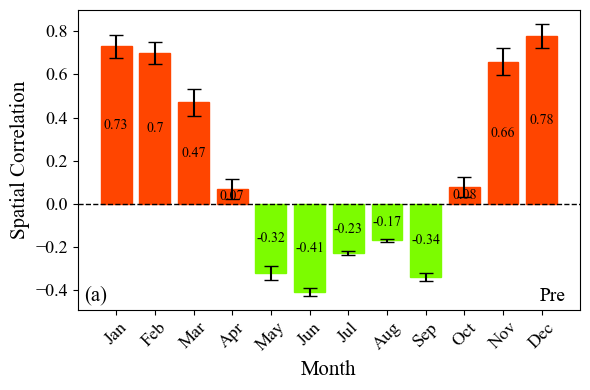

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# داده‌ها را به یک DataFrame تبدیل کنید
data = """Month,core,standard_error
Jan, 	73%,	0.052197829
Feb,	70%,	0.051978916
Mar,	47%,	0.064161394
Apr,	07%,	0.04558663
May,	-32%,	0.031707374
Jun,	-41%,	0.019245802
Jul,	-23%,	0.009412261
Aug,	-17%,	0.006497749
Sep,	-34%,	0.020332206
Oct,	08%,	0.046379959
Nov,	66%,	0.06169394
Dec,	78%,	0.055716487"""

# داده‌ها را به صورت DataFrame بخوانید
df = pd.read_csv(StringIO(data))

# درصد کورلیشن را به اعداد عشرتی تبدیل کنید (بدون علامت درصد)
df['core'] = df['core'].str.rstrip('%').astype(float) / 100

# تعیین رنگ برای نمایش مثبت و منفی
colors = ['red' if x > 0 else 'lightgreen' for x in df['core']]

# نمودار مستطیلی را رسم کنید
plt.figure(figsize=(6, 4))
bars = plt.bar(df['Month'], df['core'], yerr=df['standard_error'], capsize=5, color=colors, edgecolor='black', linewidth=1)

# تنظیم فونت به Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# افزودن عنوان و برچسب‌های محورها
plt.xlabel('Month', fontsize=15)
plt.ylabel('Spatial Correlation', fontsize=15)
#plt.title('Core Correlation vs. Month',)
#plt.legend(['LST'])
plt.text(-0.83,-0.45,'(a)', fontsize=15)
plt.text(10.95,-0.45,'Pre', fontsize=14)



# تغییر رنگ خطوط خط مشی به متن مشابه با رنگ نمودارها
for bar in bars:
    if bar.get_height() > 0:
        bar.set_color('orangered')
    else:
        bar.set_color('lawngreen')

    # اضافه کردن مقدار core در وسط مستطیل
    plt.text(bar.get_x() + bar.get_width() / 2, 0.5 * bar.get_height(), str(round(bar.get_height(), 2)), ha='center', va='center')

plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)

# اضافه کردن خط مشخص به محور x
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.savefig('core_06_pre.tiff', format='tiff', dpi=300)
plt.show()

